In [1]:
# 라이브러리 설치
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 구축
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

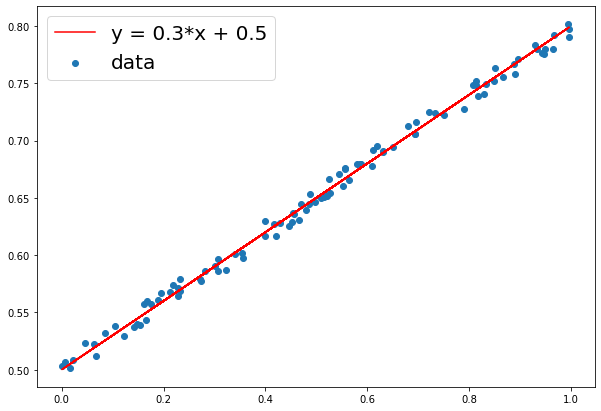

w: 0.3, b: 0.5


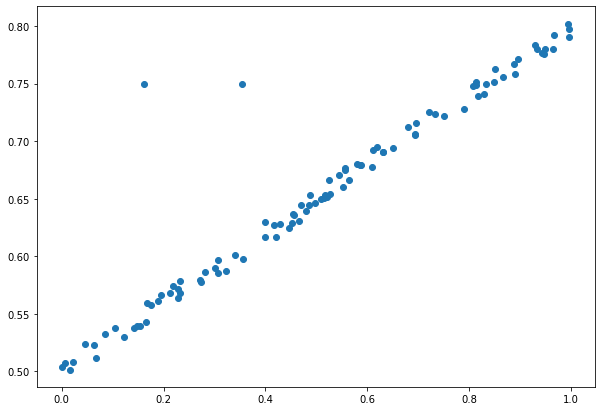

In [3]:
# linear 구축
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

# 임의로 2개의 outlier를 추가
y[5] = 0.75
y[10] = 0.75
plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

### Gradient Descent 단항식 구현

In [10]:

# 최대 반복 횟수
num_epoch = 50

# 학습율 (learning_rate)
learning_rate = 0.5

errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b

    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = -0.62305, b = 0.82151 error = 0.28912
 5 w = -0.42650, b = 0.89095 error = 0.04457
10 w = -0.32051, b = 0.83534 error = 0.03251
15 w = -0.23062, b = 0.78721 error = 0.02376
20 w = -0.15405, b = 0.74621 error = 0.01742
25 w = -0.08882, b = 0.71127 error = 0.01281
30 w = -0.03324, b = 0.68152 error = 0.00947
35 w = 0.01410, b = 0.65617 error = 0.00704
40 w = 0.05443, b = 0.63457 error = 0.00528
45 w = 0.08879, b = 0.61617 error = 0.00400
------------------------------------------------------------
49 w = 0.1, b = 0.6 error = 0.00324


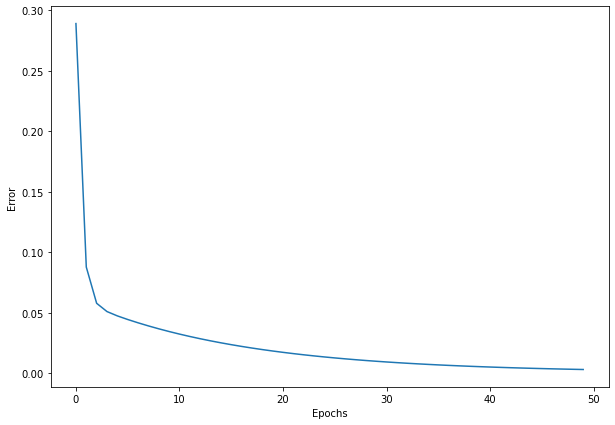

In [11]:
#시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### X 값이 여러 개인 다항식 구현

In [12]:
# 샘플 데이터 생성
# 다항식에서는 X의 갯수 만큼, W 개수도 증가
# bias (b)의 계수는 1개
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

In [13]:
#다항식 정의
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + b

In [15]:
# Gradient Descent 다항식 구현
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch = 200
learning_rate = 0.5

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)
b1 = np.random.uniform(low=-1.0, high=1.0)
b2 = np.random.uniform(low=-1.0, high=1.0)
b3 = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b
    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break
    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)

    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))
    
print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = 0.06138, w2 = 0.08814, w3 = 0.95651, b = -0.74064 error = 0.18291
 5 w1 = 0.10353, w2 = 0.14918, w3 = 0.91061, b = -0.74294 error = 0.01541
10 w1 = 0.13038, w2 = 0.19369, w3 = 0.86634, b = -0.76113 error = 0.01119
15 w1 = 0.15275, w2 = 0.23244, w3 = 0.83050, b = -0.77774 error = 0.00819
20 w1 = 0.17152, w2 = 0.26616, w3 = 0.80153, b = -0.79290 error = 0.00603
25 w1 = 0.18737, w2 = 0.29549, w3 = 0.77817, b = -0.80675 error = 0.00448
30 w1 = 0.20085, w2 = 0.32101, w3 = 0.75938, b = -0.81937 error = 0.00335
35 w1 = 0.21238, w2 = 0.34320, w3 = 0.74432, b = -0.83088 error = 0.00252
40 w1 = 0.22231, w2 = 0.36251, w3 = 0.73229, b = -0.84138 error = 0.00191
45 w1 = 0.23091, w2 = 0.37932, w3 = 0.72273, b = -0.85093 error = 0.00146
50 w1 = 0.23839, w2 = 0.39396, w3 = 0.71518, b = -0.85964 error = 0.00112
55 w1 = 0.24493, w2 = 0.40672, w3 = 0.70926, b = -0.86756 error = 0.00087
60 w1 = 0.25068, w2 = 0.41785, w3 = 0.70465, b = -0.87477 error = 0.00068
65 w1 = 0.25576, w2 = 0.42756, w3 = 0.

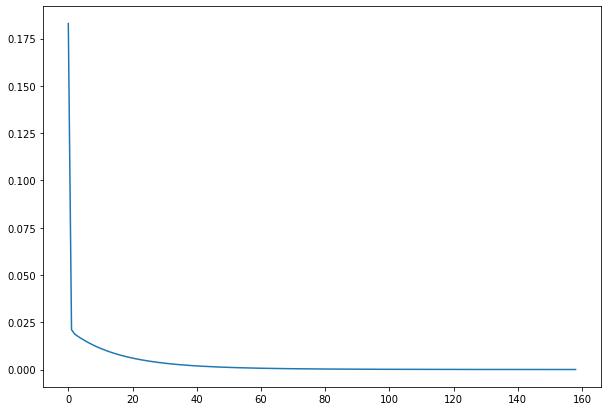

In [16]:
# Gradient Descent 다항식 시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)